<a href="https://colab.research.google.com/github/yehezkielgunawan/uas-business-intelligence/blob/main/UAS_Business_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/UAS Business Intelligence/bank-full.xlsx')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [56]:
df.head(2).to_json()

'{"age":{"0":58,"1":44},"job":{"0":"management","1":"technician"},"marital":{"0":"married","1":"single"},"education":{"0":"tertiary","1":"secondary"},"default":{"0":"no","1":"no"},"balance":{"0":2143,"1":29},"housing":{"0":"yes","1":"yes"},"loan":{"0":"no","1":"no"},"contact":{"0":"unknown","1":"unknown"},"day":{"0":5,"1":5},"month":{"0":"may","1":"may"},"duration":{"0":261,"1":151},"campaign":{"0":1,"1":1},"pdays":{"0":-1,"1":-1},"previous":{"0":0,"1":0},"poutcome":{"0":"unknown","1":"unknown"},"y":{"0":"no","1":"no"}}'

In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y']

# Encode target variable
y = y.map({'no': 0, 'yes': 1})

# One-hot encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# Normalize numerical variables
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_encoded[:, -len(numerical_cols):] = scaler.fit_transform(X_encoded[:, -len(numerical_cols):])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix (Logistic Regression):
[[7756  196]
 [ 718  373]]


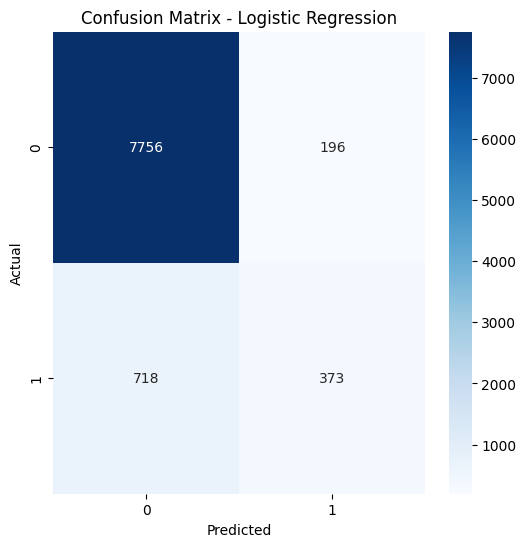

AUC (Logistic Regression): 0.6586201443306955


In [59]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
logreg_predictions = logreg.predict(X_test)

# Compute confusion matrix
logreg_cm = confusion_matrix(y_test, logreg_predictions)
print("Confusion Matrix (Logistic Regression):")
print(logreg_cm)

plot_confusion_matrix(logreg_cm, "Confusion Matrix - Logistic Regression")

# Calculate AUC
logreg_auc = roc_auc_score(y_test, logreg_predictions)
print("AUC (Logistic Regression):", logreg_auc)

Confusion Matrix (Decision Tree):
[[7358  594]
 [ 556  535]]


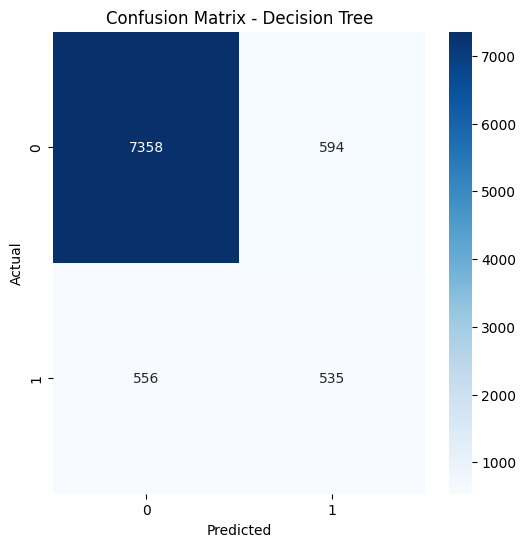

AUC (Decision Tree): 0.7078388064408448


In [60]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt.predict(X_test)

# Compute confusion matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
print("Confusion Matrix (Decision Tree):")
print(dt_cm)

plot_confusion_matrix(dt_cm, "Confusion Matrix - Decision Tree")

# Calculate AUC
dt_auc = roc_auc_score(y_test, dt_predictions)
print("AUC (Decision Tree):", dt_auc)

Confusion Matrix (Random Forest):
[[7724  228]
 [ 641  450]]


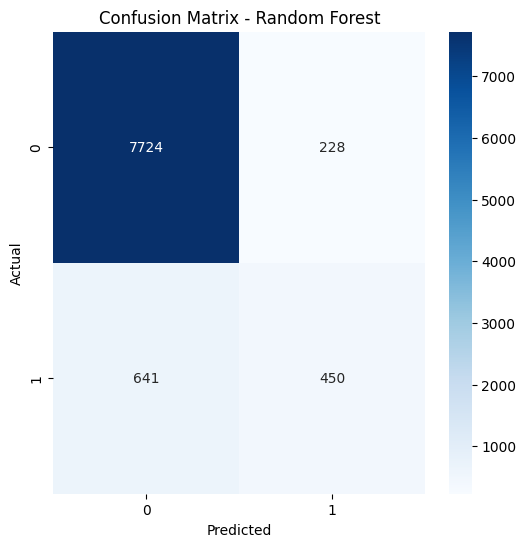

AUC (Random Forest): 0.6918967978355928


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf.predict(X_test)

# Compute confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix (Random Forest):")
print(rf_cm)

plot_confusion_matrix(rf_cm, "Confusion Matrix - Random Forest")

# Calculate AUC
rf_auc = roc_auc_score(y_test, rf_predictions)
print("AUC (Random Forest):", rf_auc)

Confusion Matrix (SVM):
[[7774  178]
 [ 702  389]]


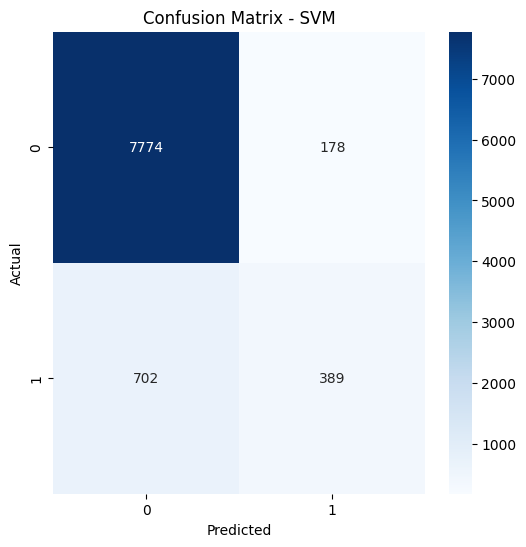

AUC (SVM): 0.6670846573483061


In [62]:
from sklearn.svm import SVC

# Create and train the model
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set
svm_predictions = svm.predict(X_test)

# Compute confusion matrix
svm_cm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix (SVM):")
print(svm_cm)

plot_confusion_matrix(svm_cm, "Confusion Matrix - SVM")

# Calculate AUC
svm_auc = roc_auc_score(y_test, svm_predictions)
print("AUC (SVM):", svm_auc)

Confusion Matrix (KNN):
[[7714  238]
 [ 683  408]]


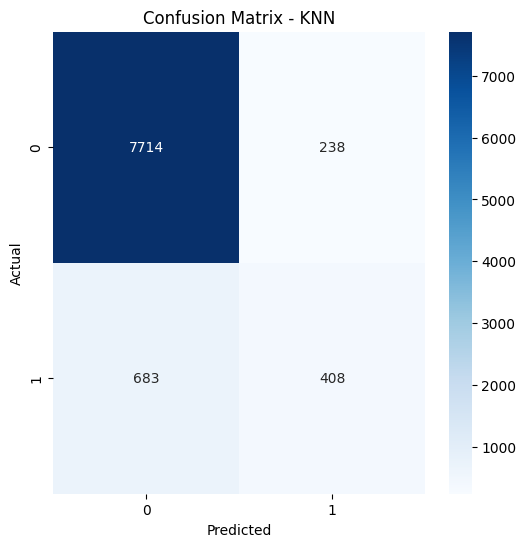

AUC (KNN): 0.6720196292327751


In [63]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Compute confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix (KNN):")
print(knn_cm)

plot_confusion_matrix(knn_cm, "Confusion Matrix - KNN")

# Calculate AUC
knn_auc = roc_auc_score(y_test, knn_predictions)
print("AUC (KNN):", knn_auc)